In [1]:
import os
import itertools
import glob
import datetime
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set_theme(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')
pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [2]:
# STAGES = [
#     0,
#     1,
#     5,
#     10,
#     25,
#     50,
#     100,
#     250,
#     500,
#     1_000,
# ] + list(range(0, 1000, 100))
STAGES = list(range(0, 1000, 100)) + [1_000]

REPEATS = 10

In [3]:
data = []

for s in STAGES:
    for i in range(1, REPEATS+1):
        with open(f"scale_output/{s}_{i}.out") as f:
            seen = False
            # read line by line until "Replicating data from 1-2 to 1-1" comes
            for line in f:
                if "Replicating data from 1-2 to 1-1" not in line and not seen:
                    continue
                else:
                    seen = True

                if "Replicated data in" not in line:
                    continue

                # 2024-07-05 04:14:59,744:INFO:orchestrator.py: Replicated data in 16.29943061099999

                parts = line.split(" ")
                t_s = parts[5]

                data.append((s, i, float(t_s)))

                break
print(data)

[(0, 1, 0.1285683840000047), (0, 2, 0.13054001399999038), (0, 3, 0.13478605000000243), (0, 4, 0.13193594099999473), (0, 5, 0.13271684200000777), (0, 6, 0.13190910700001268), (0, 7, 0.12511890199999698), (0, 8, 0.1349241910000103), (0, 9, 0.1320650790000002), (0, 10, 0.1309090519999927), (100, 1, 1.6634805879999988), (100, 2, 1.811656193999994), (100, 3, 2.0683603340000047), (100, 4, 1.7888839660000144), (100, 5, 1.774779682000002), (100, 6, 1.8857055690000095), (100, 7, 1.9803178840000157), (100, 8, 2.029557656999998), (100, 9, 1.9890937059999771), (100, 10, 1.899787951999997), (200, 1, 2.656831189000002), (200, 2, 2.7132071489999987), (200, 3, 2.6924242249999963), (200, 4, 2.482960124999977), (200, 5, 2.62059329600001), (200, 6, 2.813852365999992), (200, 7, 2.842392712999981), (200, 8, 2.7104368169999873), (200, 9, 3.044997840999997), (200, 10, 2.9092861510000034), (300, 1, 3.7400025669999764), (300, 2, 4.192647910000005), (300, 3, 3.967534268999998), (300, 4, 3.555016978999987), (300

In [4]:
df = pd.DataFrame(data, columns=["stage", "repeat", "time_s"])

In [5]:
df.head()

,stage,repeat,time_s
0,0,1,0.128568
1,0,2,0.130540
2,0,3,0.134786
3,0,4,0.131936
4,0,5,0.132717


In [6]:
df.groupby("stage").mean()

,repeat,time_s
stage,,
0,5.5,0.131347
100,5.5,1.889162
200,5.5,2.748698
300,5.5,3.766866
400,5.5,4.644207
500,5.5,5.631738
600,5.5,6.494883
700,5.5,7.495048
800,5.5,8.329193


<Axes: xlabel='stage', ylabel='time_s'>

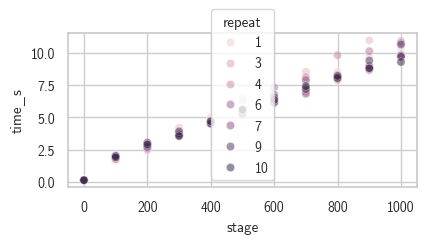

In [7]:
sns.scatterplot(data=df, x='stage', y='time_s', hue='repeat', alpha=0.5)

/var/folders/2f/b2y6thfs2051_m0fs57vb_sc0000gn/T/ipykernel_81763/3472273118.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  g = sns.pointplot(data=df, x='stage', y='time_s', linewidth=1, marker='o', errwidth=1, color='black', native_scale=True)


[Text(0.5, 0, 'Data Size (MB)'), Text(0, 0.5, 'Replication Time (s)')]

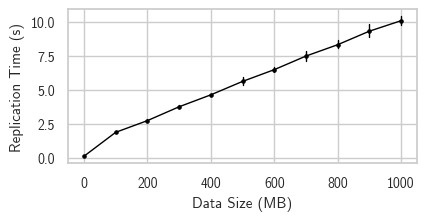

In [8]:
g = sns.pointplot(data=df, x='stage', y='time_s', linewidth=1, marker='o', errwidth=1, color='black', native_scale=True)
g.set(xlabel="Data Size (MB)", ylabel="Replication Time (s)")
# add vertical lines to the grid

# plt.savefig("simple-migration.pdf", bbox_inches='tight')

/var/folders/2f/b2y6thfs2051_m0fs57vb_sc0000gn/T/ipykernel_81763/826066809.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  g = sns.pointplot(data=graph_df, x='stage', y='time_s', linewidth=1, marker='o', errwidth=1, hue="Experiment", native_scale=True, palette=["#000000", "#999999"], linestyles=["solid", "dashed", "dotted"])
webf NOT subset; don't know how to subset; dropped


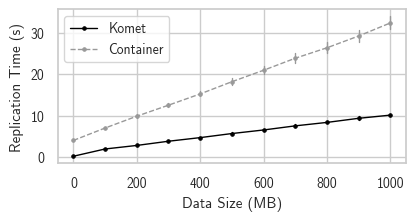

In [24]:
graph_df = df.copy()
graph_df["Experiment"] = "Komet"

tmp = pd.read_csv("../containers/unsorted-results.csv")
tmp["Experiment"] = "Container"
tmp["time_s"] = tmp["other_checkpoint_time"] + tmp["receive_time"] + tmp["restore_time"]

graph_df = pd.concat([graph_df, tmp])

g = sns.pointplot(data=graph_df, x='stage', y='time_s', linewidth=1, marker='o', errwidth=1, hue="Experiment", native_scale=True, palette=["#000000", "#999999"], linestyles=["solid", "dashed", "dotted"])
g.set(xlabel="Data Size (MB)", ylabel="Replication Time (s)")
g.legend(title=None)
# add vertical lines to the grid

plt.savefig("simple-migration.pdf", bbox_inches='tight')